In [8]:
import pandas as pd
# python3 -m spacy download en

import numpy as np
import pandas as pd
import re, nltk, gensim, spacy

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

ModuleNotFoundError: No module named 'spacy'

In [5]:
import pickle

In [6]:
tweets = pd.read_csv('2potus_out.txt', sep="|")

In [7]:
tweets.head()

,Unnamed: 0,texto,fecha,incompleto,cuenta
0,1,"rt @vp: under @potus, america stands with isra...",12-03-2017 16:58:08,NaN,2potus
1,2,rt @realdonaldtrump: report: “anti-trump fbi a...,12-03-2017 16:56:10,NaN,2potus
2,3,rt @realdonaldtrump: people who lost money whe...,12-03-2017 16:55:52,NaN,2potus
3,4,"rt @realdonaldtrump: after years of comey, wit...",12-03-2017 16:55:51,NaN,2potus
4,5,rt @realdonaldtrump: i never asked comey to st...,12-03-2017 16:55:38,NaN,2potus


In [108]:
tweets['texto'][0]

"rt @vp: under @potus, america stands with israel. discussed w/ @thebrodyfile that we'll deliver that message in israel later this month &amp; t…"

In [8]:
text = tweets[['texto']]

In [9]:
text.head()


,texto
0,"rt @vp: under @potus, america stands with isra..."
1,rt @realdonaldtrump: report: “anti-trump fbi a...
2,rt @realdonaldtrump: people who lost money whe...
3,"rt @realdonaldtrump: after years of comey, wit..."
4,rt @realdonaldtrump: i never asked comey to st...


In [10]:
text.size

1797

In [11]:
# removing missing values
text = text.dropna()

In [12]:
text.size

1797

In [13]:
# Turning into a list
data = text.texto.values.tolist()

In [14]:
data


["rt @vp: under @potus, america stands with israel. discussed w/ @thebrodyfile that we'll deliver that message in israel later this month &amp; t…",
 'rt @realdonaldtrump: report: “anti-trump fbi agent led clinton email probe”  now it all starts to make sense!',
 'rt @realdonaldtrump: people who lost money when the stock market went down 350 points based on the false and dishonest reporting of brian r…',
 'rt @realdonaldtrump: after years of comey, with the phony and dishonest clinton investigation (and more), running the fbi, its reputation i…',
 'rt @realdonaldtrump: i never asked comey to stop investigating flynn. just more fake news covering another comey lie!',
 'rt @realdonaldtrump: many people in our country are asking what the “justice” department is going to do about the fact that totally crooked…',
 'rt @realdonaldtrump: so general flynn lies to the fbi and his life is destroyed, while crooked hillary clinton, on that now famous fbi holi…',
 'rt @realdonaldtrump: 62 years ago

In [15]:
len(data)

1797

In [32]:
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \s
<ipython-input-32-c70a636c4929>:2: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [17]:
# Removing single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [18]:
data = [re.sub("realdonaldtrump", "", sent) for sent in data]

In [19]:
data = [re.sub("trump", "", sent) for sent in data]

In [20]:
data

['rt @vp: under @potus, america stands with israel. discussed w/ @thebrodyfile that well deliver that message in israel later this month &amp; t…',
 'rt @: report: “anti- fbi agent led clinton email probe” now it all starts to make sense!',
 'rt @: people who lost money when the stock market went down 350 points based on the false and dishonest reporting of brian r…',
 'rt @: after years of comey, with the phony and dishonest clinton investigation (and more), running the fbi, its reputation i…',
 'rt @: i never asked comey to stop investigating flynn. just more fake news covering another comey lie!',
 'rt @: many people in our country are asking what the “justice” department is going to do about the fact that totally crooked…',
 'rt @: so general flynn lies to the fbi and his life is destroyed, while crooked hillary clinton, on that now famous fbi holi…',
 'rt @: 62 years ago this week, a brave seamstress in montgomery, alabama uttered one word that changed history... ',
 'rt @: we are

In [21]:
pprint(data[:1])


['rt @vp: under @potus, america stands with israel. discussed w/ @thebrodyfile '
 'that well deliver that message in israel later this month &amp; t…']


## Tokenizing and cleaning-up

In [81]:
def token_clean(text):
    for sentence in text:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(token_clean(data))

print(data_words[:1])

[['rt', 'vp', 'under', 'potus', 'america', 'stands', 'with', 'israel', 'discussed', 'thebrodyfile', 'that', 'well', 'deliver', 'that', 'message', 'in', 'israel', 'later', 'this', 'month', 'amp']]


## Lemmatization 

In [33]:

%%bash 
python -m spacy download en


  Running setup.py install for en-core-web-sm: started
    Running setup.py install for en-core-web-sm: finished with status 'done'

    Error: Couldn't link model to 'en'
    Creating a symlink in spacy/data failed. Make sure you have the required
    permissions and try re-running the command as admin, or use a
    virtualenv. You can still import the model as a module and call its
    load() method, or create the symlink manually.

    C:\Users\mdiarodr\AppData\Local\Continuum\anaconda3\lib\site-packages\en_core_web_sm
    -->
    C:\Users\mdiarodr\AppData\Local\Continuum\anaconda3\lib\site-packages\spacy\data\en


    Creating a shortcut link for 'en' didn't work (maybe you don't have
    admin permissions?), but you can still load the model via its full
    package name: nlp = spacy.load('{name}')
    Download successful but linking failed



bash.exe: warning: could not find /tmp, please create!


In [82]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['potus america stand discuss thebrodyfile well deliver message israel later month amp', 'report anti fbi agent lead clinton email probe now start make sense']


## Loading stopwords list

In [36]:
english_stop = open('stopwords-en.txt', encoding = 'utf-8', errors = 'ignore').read().split('\n')

In [37]:
english_stop.pop(-1)

''

In [38]:
english_stop[-1]

'zr'

## Creating the words matrix

In [39]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words=english_stop,             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [41]:
data_vectorized

<1797x232 sparse matrix of type '<class 'numpy.int64'>'
	with 5991 stored elements in Compressed Sparse Row format>

In [40]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  1.43702147257 %


In [42]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_topics=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default value
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

C:\Users\mdiarodr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=20, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


## Model performance

In [43]:
# Log Likelyhood: The higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: the lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -33267.0338896
Perplexity:  211.907060465
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'n_topics': 20,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


## GridSearch

In [29]:
######### Se demora un resto #############
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_m

/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_m

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_components': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Parameters of the best topic model

In [44]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

NameError: name 'model' is not defined

/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/cesartrompetero/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


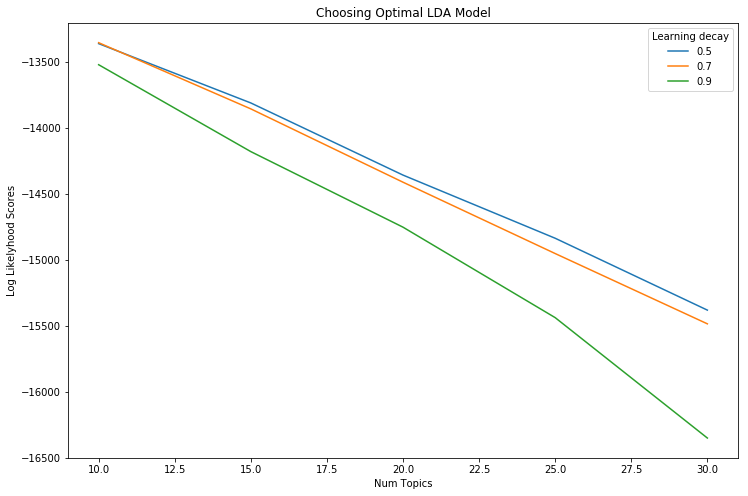

In [32]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

## Save the model to disk

In [33]:
filename = 'potus_lda_model.sav'
pickle.dump(best_lda_model, open(filename, 'wb'))

## Load model from disk

In [45]:
filename = 'potus_lda_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

## Main topic in each document

In [106]:
# Create Document - Topic Matrix
lda_output = loaded_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(10)]

# index names
docnames = ["Tweet" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get main topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style

df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Tweet0,0.01,0.01,0.01,0.59,0.01,0.01,0.01,0.13,0.2,0.01,3
Tweet1,0.03,0.37,0.03,0.03,0.03,0.03,0.03,0.37,0.03,0.03,1
Tweet2,0.05,0.55,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,1
Tweet3,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,7
Tweet4,0.03,0.7,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,1
Tweet5,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,7
Tweet6,0.03,0.03,0.03,0.03,0.03,0.03,0.27,0.53,0.03,0.03,7
Tweet7,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0
Tweet8,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.5,0.4,8
Tweet9,0.01,0.01,0.01,0.01,0.01,0.16,0.01,0.01,0.01,0.73,9


In [107]:
#df_document_topic

## Topic distribution

In [48]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Tweets")
df_topic_distribution.columns = ['Topic Num', 'Num Tweets']
df_topic_distribution

,Topic Num,Num Tweets
0,3,330
1,0,228
2,8,204
3,6,174
4,2,174
5,7,164
6,4,163
7,1,139
8,5,123
9,9,98


## Visualization

In [49]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(loaded_model, data_vectorized, vectorizer, mds='tsne')
panel

C:\Users\mdiarodr\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3       12.822961 -160.496918       1        1  17.468061
8       47.694752  107.878510       2        1  13.088323
6     -168.628098  103.761658       3        1  10.356887
4     -186.464874  -27.819773       4        1  10.104267
7       25.022379  -25.168491       5        1   9.990064
2      -66.311813   35.636459       6        1   9.671780
9      -54.109062  170.970245       7        1   8.657418
5      127.343407  -93.288521       8        1   8.238872
1      -88.987122  -97.412933       9        1   6.529515
0      145.176453   38.293037      10        1   5.894814, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
229   Default  185.000000      whitehouse  185.000000  30.0000  30.0000
138   Default   84.000000       obamacare   84.000000  29.0000  29.0000
177   Default  135.000000         scavino  135.000000  28.0000  28.0000
6     Default  110.000000         america  110.000000  27.0000  27.0000
8     Default  152.000000        american  152.000000  26.0000  26.0000
10    Default  381.000000             amp  381.000000  25.0000  25.0000
96    Default   86.000000           honor   86.000000  24.0000  24.0000
193   Default   63.000000            sign   63.000000  23.0000  23.0000
132   Default   67.000000          nation   67.000000  22.0000  22.0000
149   Default  355.000000           potus  355.000000  21.0000  21.0000
154   Default  149.000000       president  149.000000  20.0000  20.0000
67    Default   76.000000          family   76.000000  19.0000  19.0000
106   Default   59.000000          ivanka   59.000000  18.0000  18.0000
65    Default   47.000000       executive   47.000000  17.0000  17.0000
43    Default   56.000000         country   56.000000  16.0000  16.0000
24    Default   50.000000         cabinet   50.000000  15.0000  15.0000
205   Default   41.000000           swear   41.000000  14.0000  14.0000
157   Default   47.000000        presssec   47.000000  13.0000  13.0000
74    Default   88.000000          flotus   88.000000  12.0000  12.0000
230   Default   39.000000           woman   39.000000  11.0000  11.0000
133   Default   49.000000        national   49.000000  10.0000  10.0000
208   Default   71.000000             tax   71.000000   9.0000   9.0000
108   Default   72.000000             job   72.000000   8.0000   8.0000
1     Default   42.000000         address   42.000000   7.0000   7.0000
63    Default   39.000000         evening   39.000000   6.0000   6.0000
124   Default   53.000000         meeting   53.000000   5.0000   5.0000
15    Default   40.000000          behalf   40.000000   4.0000   4.0000
123   Default   39.000000            meet   39.000000   3.0000   3.0000
136   Default   30.000000            news   30.000000   2.0000   2.0000
218   Default   51.000000          united   51.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
9     Topic10   14.498578  americanspirit   15.479878   2.7656  -3.2289
150   Topic10   14.248495     potusabroad   15.313552   2.7590  -3.2463
207   Topic10   12.341813        taormina   13.269945   2.7586  -3.3900
92    Topic10   11.054257           heart   11.954880   2.7528  -3.5002
134   Topic10   11.262771            neil   12.181024   2.7527  -3.4815
30    Topic10    9.106525           child   10.005970   2.7369  -3.6940
110   Topic10   17.033527    jointaddress   25.263774   2.4369  -3.0678
170   Topic10    8.512966      republican   15.792341   2.2132  -3.7614
11    Topic10    7.957037          arrive   21.748200   1.8256  -3.8289
225   Topic10   14.477601           visit   43.487190   1.7312  -3.2304
29    Topic10    4.840512        ceremony   17.204541   1.5629  -4.3260
99    Topic10    2.730351       hurricane   13.623447   1.2237  -4.8986
96    Topic10   16.29

## Topics keywords

In [50]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(loaded_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames


df_topic_keywords.head()

,action,address,administration,affect,afternoon,air,america,americafirst,american,americanspirit,...,vegas,veteran,vietnam,visit,vote,war,weekly,whitehouse,woman,worker
Topic0,0.100133,0.100138,0.100167,0.100200,0.101003,0.100130,0.100112,0.100101,0.100164,13.966494,...,0.100131,0.100159,0.100143,13.946287,0.100132,0.100125,0.100139,0.100698,36.905142,0.100125
Topic1,0.100175,0.100130,0.100140,0.100435,0.100150,0.100127,0.100220,0.100172,0.100151,0.111137,...,2.511995,0.100161,0.101659,0.100135,0.100108,11.319152,0.100127,0.100132,0.100138,0.100126
Topic2,19.117412,0.100127,3.249987,0.100149,0.100126,0.100148,0.100136,0.100113,0.100174,0.104844,...,1.753408,0.100115,0.101075,0.100163,0.100151,0.100154,0.100096,134.592062,0.100158,0.100144
Topic3,0.100140,0.101502,0.100130,0.100355,0.100602,19.782277,0.101124,0.100126,0.100182,0.100388,...,3.030620,0.100126,21.327368,20.772821,0.100184,0.100967,0.100303,0.105348,0.154639,0.100122
Topic4,0.100209,0.101754,0.100359,0.100330,0.100233,0.101049,0.100281,0.100152,0.100151,0.100113,...,2.195584,0.100147,0.100794,7.601870,0.105180,0.100135,0.100375,0.100113,0.100420,0.100148


In [52]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=loaded_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=loaded_model, n_words=1)        
topic_keywords

[array(['swear'],
       dtype='<U15'), array(['obamacare'],
       dtype='<U15'), array(['whitehouse'],
       dtype='<U15'), array(['potus'],
       dtype='<U15'), array(['family'],
       dtype='<U15'), array(['honor'],
       dtype='<U15'), array(['amp'],
       dtype='<U15'), array(['country'],
       dtype='<U15'), array(['american'],
       dtype='<U15'), array(['cabinet'],
       dtype='<U15')]

In [57]:

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords=df_topic_keywords.reset_index()
df_topic_keywords.columns=['topic','word 0']

df_topic_keywords

,topic,word 0
0,Topic 0,swear
1,Topic 1,obamacare
2,Topic 2,whitehouse
3,Topic 3,potus
4,Topic 4,family
5,Topic 5,honor
6,Topic 6,amp
7,Topic 7,country
8,Topic 8,american
9,Topic 9,cabinet


## Predict topics 

In [113]:
# predict topic  given a tweet
nlp = spacy.load('en', disable=['parser', 'ner'])

def token_clean(sentence):
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

#data_words = list(token_clean(data))

#print(data_words[:1])
#print(data)

def predict_topic(text_, nlp=nlp):
  #  global token_clean
   # global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(token_clean(text_))
    #mytext_2 = token_clean(text_)

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = loaded_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic
    #return df_topic_keywords
    #return topic_probability_scores
    #return mytext_2
    return mytext_3
    #return token_clean(text)
    return(text_)

# Predict the topic
#mytext = "The U.S. is working very closely with the Government of Thailand to help get all of the children out of the cave and to safety. Very brave and talented people!"
#mytext = "happy birthday, america!"
mytext = tweets['texto'][3]
topic= predict_topic(text_ = mytext)
print(topic)

['Topic 7', 'country']


In [105]:
data_vectorized

#df=pd.DataFrame(data_vectorized)

<1797x232 sparse matrix of type '<class 'numpy.int64'>'
	with 5991 stored elements in Compressed Sparse Row format>

## Clustering 

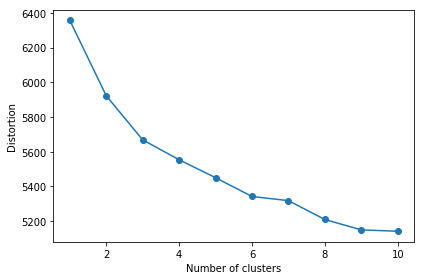

In [60]:
# determining the number of clusters


distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(data_vectorized)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()



In [37]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words=english_stop,             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

In [38]:
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [39]:
data_lemmatized

['potus america stand discuss thebrodyfile well deliver message israel later month amp',
 'report anti fbi agent lead clinton email probe now start make sense',
 'people who lose money when stock market go point base false dishonest reporting brian',
 'year comey phony dishonest clinton investigation more run fbi  reputation',
 'never ask comey stop investigate flynn just more fake news cover comey lie',
 'many people  country be ask what justice department be go do fact totally crooked',
 'so general flynn lie fbi  life be destroy crooked now famous fbi holi',
 'year ago week brave seamstress montgomery alabama utter word that change history',
 'be step closer deliver massive tax cut work family america special thank senatema',
 'vp honor preside tonight historic tax cut vote senate',
 'scavino vp mike pence roll call vote historic tax cut ame capitol hill washington great week conclude',
 'tonight tax cut vote senate be historic victory american people grateful support senategop pas'

In [40]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(data_vectorized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
topic_tag = []
i = 0
for tweet in data_lemmatized:
    Y = vectorizer.transform([tweet])
    topics_prediction = model.predict(Y)
    topic_tag.append(topics_prediction[0])

In [63]:
topic_tag

[1,
 3,
 3,
 3,
 9,
 3,
 3,
 3,
 7,
 7,
 7,
 7,
 7,
 7,
 3,
 6,
 3,
 3,
 3,
 9,
 0,
 3,
 6,
 3,
 3,
 3,
 7,
 1,
 7,
 1,
 7,
 5,
 3,
 0,
 9,
 3,
 3,
 9,
 3,
 1,
 7,
 3,
 1,
 3,
 3,
 3,
 8,
 3,
 3,
 1,
 3,
 7,
 3,
 8,
 1,
 3,
 3,
 3,
 7,
 9,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 3,
 3,
 3,
 3,
 0,
 1,
 3,
 6,
 7,
 3,
 1,
 7,
 0,
 3,
 6,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 7,
 0,
 5,
 8,
 8,
 5,
 3,
 7,
 3,
 3,
 3,
 3,
 6,
 5,
 3,
 3,
 3,
 6,
 6,
 6,
 3,
 3,
 3,
 6,
 3,
 7,
 6,
 7,
 1,
 3,
 1,
 3,
 3,
 0,
 3,
 3,
 6,
 0,
 3,
 6,
 3,
 3,
 6,
 6,
 6,
 6,
 0,
 6,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 6,
 3,
 6,
 6,
 8,
 1,
 0,
 6,
 3,
 3,
 6,
 6,
 6,
 3,
 3,
 3,
 3,
 3,
 3,
 9,
 3,
 3,
 6,
 6,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 0,
 0,
 3,
 8,
 6,
 6,
 6,
 1,
 6,
 3,
 3,
 3,
 6,
 0,
 0,
 3,
 3,
 6,
 3,
 0,
 8,
 8,
 8,
 3,
 8,
 3,
 2,
 3,
 1,
 3,
 3,
 0,
 0,
 3,
 3,
 1,
 6,
 0,
 3,
 6,
 0,
 7,
 3,
 3,
 6,
 6,
 6,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 3,
 3,
 0,
 8,
 1,
 0,
 3,
 3,
 3,


In [42]:
print("Cluster main topics:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Cluster main topics:
Cluster 0:
 tax
 cut
 job
 pass
 middle
 potus
 taxreform
 class
 whitehouse
 remark
Cluster 1:
 amp
 president
 america
 honor
 job
 united
 flotus
 ivanka
 country
 obamacare
Cluster 2:
 weekly
 address
 maga
 whitehouse
 potus
 icymi
 tomorrow
 continue
 effort
 historic
Cluster 3:
 story
 whitehouse
 obamacare
 potus
 share
 fight
 worker
 flotu
 god
 future
Cluster 4:
 potus
 amp
 presssec
 president
 america
 flotus
 visit
 meet
 stand
 nation
Cluster 5:
 american
 amp
 potus
 job
 whitehouse
 obamacare
 ivanka
 business
 jointaddress
 health
Cluster 6:
 whitehouse
 potus
 honor
 flotus
 president
 amp
 sign
 meeting
 host
 remark
Cluster 7:
 tax
 cut
 american
 reform
 amp
 potus
 family
 historic
 america
 business
Cluster 8:
 amp
 potus
 flotus
 woman
 president
 american
 job
 life
 tax
 country
Cluster 9:
 scavino
 potus
 president
 potusinasia
 amp
 vietnam
 korea
 melania
 flotus
 south


In [65]:
len(topic_tag)

1797

In [66]:
df_potustrump = pd.read_csv('2potus_out.txt', sep="|")

In [68]:
df_potustrump.head()

,Unnamed: 0,texto,fecha,incompleto,cuenta
0,1,"rt @vp: under @potus, america stands with isra...",12-03-2017 16:58:08,NaN,2potus
1,2,rt @realdonaldtrump: report: “anti-trump fbi a...,12-03-2017 16:56:10,NaN,2potus
2,3,rt @realdonaldtrump: people who lost money whe...,12-03-2017 16:55:52,NaN,2potus
3,4,"rt @realdonaldtrump: after years of comey, wit...",12-03-2017 16:55:51,NaN,2potus
4,5,rt @realdonaldtrump: i never asked comey to st...,12-03-2017 16:55:38,NaN,2potus


In [70]:
df_potustrump.shape

(1797, 5)

In [71]:
df_potustrump = df_potustrump.dropna(subset=['texto'], how='all')

In [72]:
df_potustrump.shape

(1797, 5)

In [73]:
df_potustrump['cluster'] = topic_tag

In [74]:
df_potustrump.head()

,Unnamed: 0,texto,fecha,incompleto,cuenta,cluster
0,1,"rt @vp: under @potus, america stands with isra...",12-03-2017 16:58:08,NaN,2potus,1
1,2,rt @realdonaldtrump: report: “anti-trump fbi a...,12-03-2017 16:56:10,NaN,2potus,3
2,3,rt @realdonaldtrump: people who lost money whe...,12-03-2017 16:55:52,NaN,2potus,3
3,4,"rt @realdonaldtrump: after years of comey, wit...",12-03-2017 16:55:51,NaN,2potus,3
4,5,rt @realdonaldtrump: i never asked comey to st...,12-03-2017 16:55:38,NaN,2potus,9


In [75]:
df_potustrump.to_csv('potustrump_export.csv', sep='|',encoding='utf-8')

In [76]:
df4 = pd.read_csv('potustrump_export.csv', sep='|', encoding='utf-8')

In [77]:
df4.head()

,Unnamed: 0,Unnamed: 0.1,texto,fecha,incompleto,cuenta,cluster
0,0,1,"rt @vp: under @potus, america stands with isra...",12-03-2017 16:58:08,NaN,2potus,1
1,1,2,rt @realdonaldtrump: report: “anti-trump fbi a...,12-03-2017 16:56:10,NaN,2potus,3
2,2,3,rt @realdonaldtrump: people who lost money whe...,12-03-2017 16:55:52,NaN,2potus,3
3,3,4,"rt @realdonaldtrump: after years of comey, wit...",12-03-2017 16:55:51,NaN,2potus,3
4,4,5,rt @realdonaldtrump: i never asked comey to st...,12-03-2017 16:55:38,NaN,2potus,9


Text(0.5,1,'Segregation of Topic Clusters')

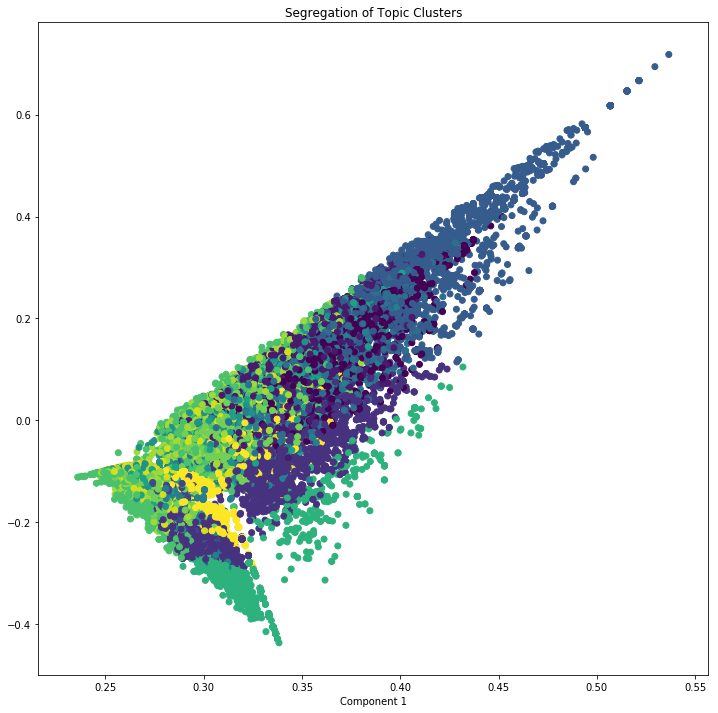

In [74]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )